In [1]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
df = pandas.read_csv('stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Pre-processing data

In [3]:
#finding null values in the dataset
a = df.isnull().sum()


In [4]:
#Getting the mean BMI for male, female and other
maleBMI = np.mean(df[df['gender'] == 'Female']['bmi'])
femaleBMI = np.mean(df[df['gender'] == 'Male']['bmi'])
otherBMI = np.mean(df['bmi'])

In [5]:
#filling all NaN values with 0
df['bmi'] = df['bmi'].fillna(0)

In [6]:
#looping through the dataset and replacing all 0 values with new mean BMI values.
#impute method
for i in range(0,5035):
    if(df['bmi'][i] == 0):
        
        if(df['gender'][i] == 'Male'):
            df['bmi'][i] = maleBMI
        
        elif(df['gender'][i] == 'Female'):
            df['bmi'][i] = femaleBMI
            
        else:
            df['bmi'][i] = otherBMI
            


C:\Users\Tushar\AppData\Local\Temp/ipykernel_19060/247935657.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'][i] = femaleBMI
C:\Users\Tushar\AppData\Local\Temp/ipykernel_19060/247935657.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'][i] = maleBMI


In [7]:
a = df.isnull().sum()
a

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Data analysis

stroke
0    43.0
1    71.0
Name: age, dtype: float64


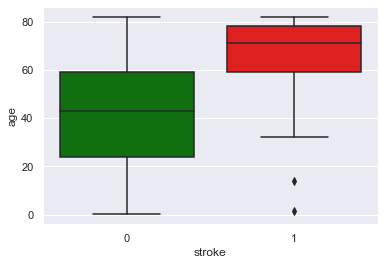

In [8]:
#boxplot , age vs stroke. This box plot shows the age distribution between people who got strokes and who didnt.
ax = sns.boxplot(x="stroke", y="age", data=df,palette=["green","red"])

#finding median age for people who got stroke and for others who hasn't
medians = df.groupby(['stroke'])['age'].median()
print(medians)

stroke
0     91.47
1    105.22
Name: avg_glucose_level, dtype: float64


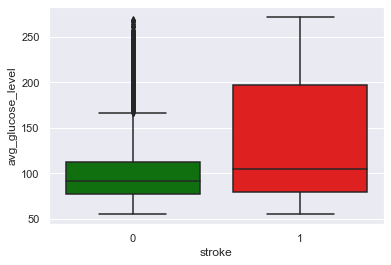

In [9]:
#boxplot , age vs gloucose_level. This box plot shows the glucose_level distribution between people who got strokes and who didnt.
ax = sns.boxplot(x="stroke", y="avg_glucose_level", data=df,palette=["green","red"])

#finding median BMI for people who got stroke and for others who hasn't
medians = df.groupby(['stroke'])['avg_glucose_level'].median()
print(medians)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

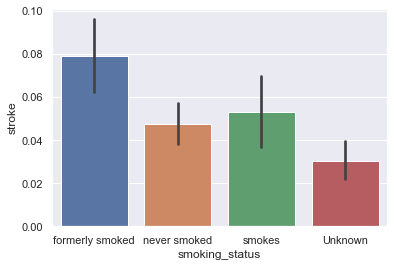

In [10]:
#shows relationships between smoking and strokes.
sns.set_theme(style="darkgrid")
sns.barplot(df['smoking_status'],df['stroke'])

In [11]:
# sns.set_theme(style="whitegrid")

# plt.figure(figsize=(20,15))

# plt.subplot(2,3,1)
# sns.boxenplot(x=df['stroke'], y=df['age'],
#               color="green", 
#               scale="linear", data=df)

# plt.subplot(2,3,2)
# sns.boxenplot(x=df['stroke'], y=df['bmi'],
#               color="b", 
#               scale="linear", data=df)

# plt.subplot(2,3,3)
# sns.boxenplot(x=df['stroke'], y=df['avg_glucose_level'],
#               color="pink", 
#               scale="linear", data=df)